In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

# https://www.kaggle.com/datasets/wadhasnalhamdan/date-fruit-image-dataset-in-controlled-environment/data

In [2]:
IMAGE_SIZE= 200
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "DateImages",
    shuffle=True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE ),
    batch_size = BATCH_SIZE
)

Found 1658 files belonging to 9 classes.


In [4]:
class_names = dataset.class_names
class_names

['Ajwa',
 'Galaxy',
 'Medjool',
 'Meneifi',
 'Nabtat Ali',
 'Rutab',
 'Shaishe',
 'Sokari',
 'Sugaey']

In [5]:
len(dataset) * 32

1664

In [6]:
for image_batch, label_batch in dataset.take(1): # only takes 1 batch from the dataset.
    print(image_batch.shape) # image_batch contains 32 images (if batch_size=32).
    print(label_batch.numpy())  # shows the class labels for those 32 images.

(32, 200, 200, 3)
[1 4 6 3 1 7 1 4 7 0 8 3 1 4 6 4 0 6 8 7 8 8 5 4 2 0 4 6 8 6 5 7]


In [7]:
images, labels = next(iter(dataset.take(1)))
images_np = images[0].numpy()
labels_np = labels.numpy()
images_np

array([[[220.9636 , 220.9636 , 220.9636 ],
        [221.     , 220.5892 , 219.0416 ],
        [221.222  , 221.222  , 219.222  ],
        ...,
        [227.92198, 223.92198, 224.92198],
        [225.51067, 222.99066, 223.99066],
        [228.1201 , 224.1201 , 223.1201 ]],

       [[221.     , 219.     , 220.     ],
        [221.     , 220.     , 218.     ],
        [220.92601, 220.92601, 220.92601],
        ...,
        [225.71399, 224.15399, 224.49399],
        [227.67516, 225.03255, 223.58008],
        [226.67088, 224.67088, 225.67088]],

       [[221.90201, 220.90201, 218.90201],
        [221.412  , 220.70601, 218.70601],
        [220.     , 220.     , 218.     ],
        ...,
        [224.7    , 224.7    , 224.09999],
        [225.     , 224.     , 222.     ],
        [227.83989, 223.83989, 222.83989]],

       ...,

       [[215.25783, 213.25783, 214.25783],
        [215.     , 213.     , 214.     ],
        [215.20987, 214.20987, 212.20987],
        ...,
        [218.91005, 216.91

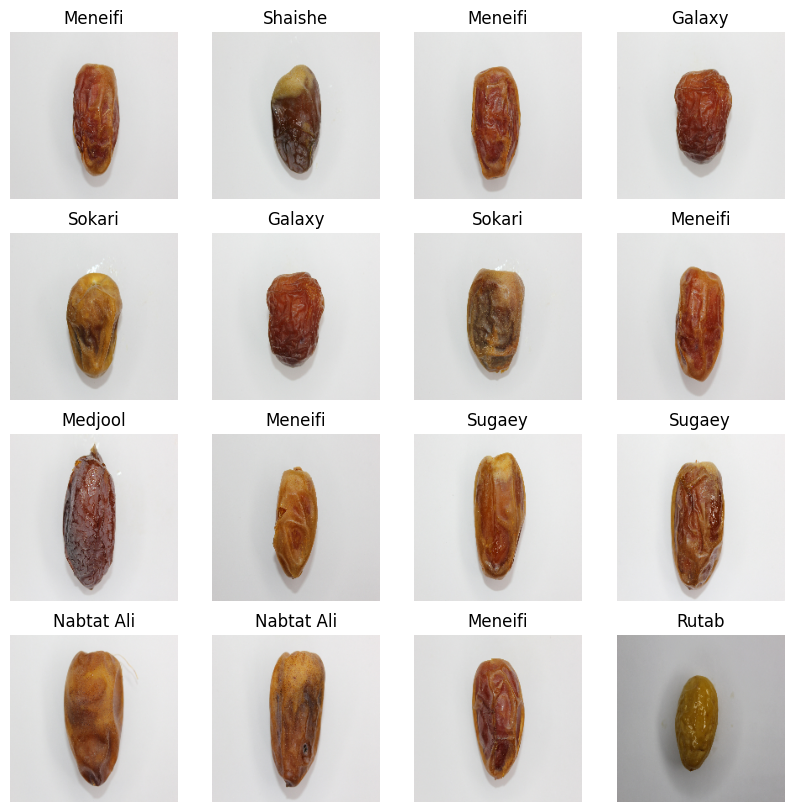

In [8]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1): # only takes 1 batch from the dataset.
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        # print(image_batch[0].shape) 
        # first image sshape in first batch which image_batch contains 32 images (if batch_size=32).


In [9]:
len(dataset)

52

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000 ):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size )
    val_size = int(val_split * ds_size )

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)


    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [12]:
len(test_ds)

5

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE ),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS )
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape= input_shape, ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , kernel_size = (3,3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D( 128,  (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,  (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,  (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 200, 200, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 200, 200, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 198, 198, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 99, 99, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 97, 97, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 48, 48, 64)          0         
 g2D)                                                 

In [17]:
model.compile(optimizer = 'adam',
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics = ['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds

)

Epoch 1/20


41/41 [==============================] - 64s 733ms/step - loss: 2.5617 - accuracy: 0.1784 - val_loss: 1.8669 - val_accuracy: 0.2879
Epoch 2/20
41/41 [==============================] - 28s 695ms/step - loss: 1.7573 - accuracy: 0.3208 - val_loss: 1.5483 - val_accuracy: 0.4035
Epoch 3/20
41/41 [==============================] - 29s 701ms/step - loss: 1.3871 - accuracy: 0.4426 - val_loss: 1.6557 - val_accuracy: 0.4472
Epoch 4/20
41/41 [==============================] - 26s 639ms/step - loss: 1.4626 - accuracy: 0.4495 - val_loss: 1.1478 - val_accuracy: 0.5413
Epoch 5/20
41/41 [==============================] - 26s 635ms/step - loss: 1.2040 - accuracy: 0.5459 - val_loss: 1.4149 - val_accuracy: 0.5391
Epoch 6/20
41/41 [==============================] - 27s 653ms/step - loss: 1.0353 - accuracy: 0.6110 - val_loss: 0.9274 - val_accuracy: 0.6432
Epoch 7/20
41/41 [==============================] - 26s 631ms/step - loss: 0.9002 - accuracy: 0.6677 - val_loss: 0.8657 - val_accuracy: 0.65

In [19]:
scores = model.evaluate(test_ds)
scores

41/41 [==============================] - 6s 149ms/step - loss: 0.4066 - accuracy: 0.8476


[0.4066222310066223, 0.8476263284683228]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

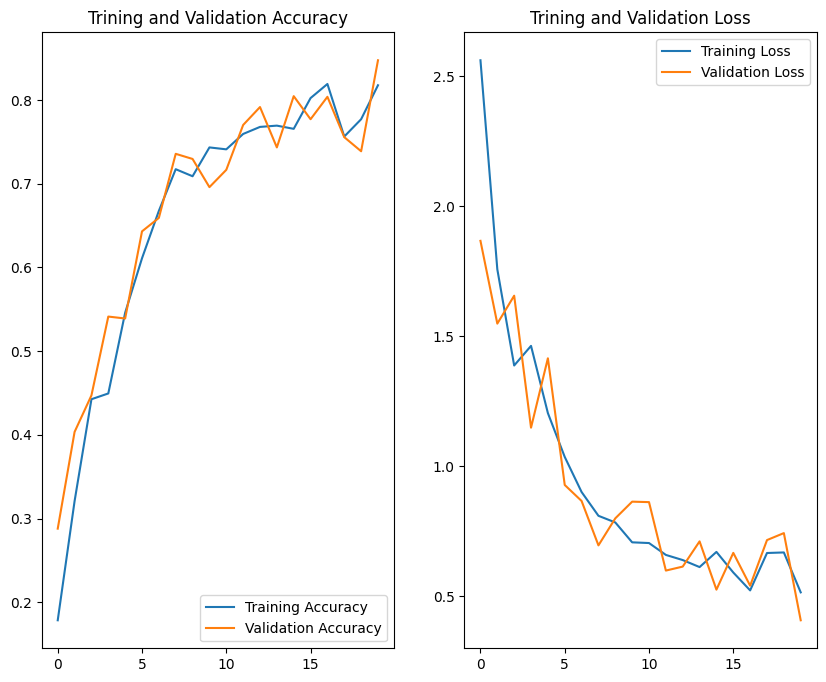

In [21]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Trining and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title("Trining and Validation Loss")
plt.show()

first image to predict: 
actual label:  Meneifi
1/1 [==============================] - 0s 450ms/step
predicted label: Meneifi


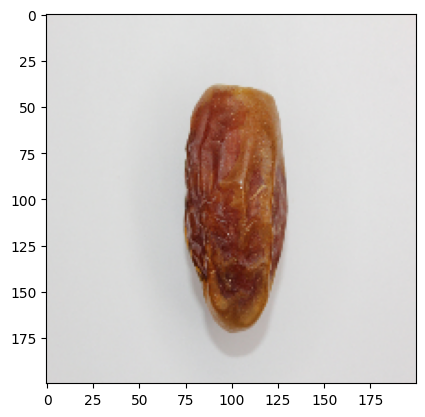

In [22]:
for images_batch, labels_batch in test_ds.take(1):
    Fimage = image_batch[0].numpy().astype("uint8")
    Flabel = labels_batch[0].numpy()
    
    print('first image to predict: ')
    plt.imshow(Fimage)
    print('actual label: ', class_names[Flabel])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])


In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 51ms/step


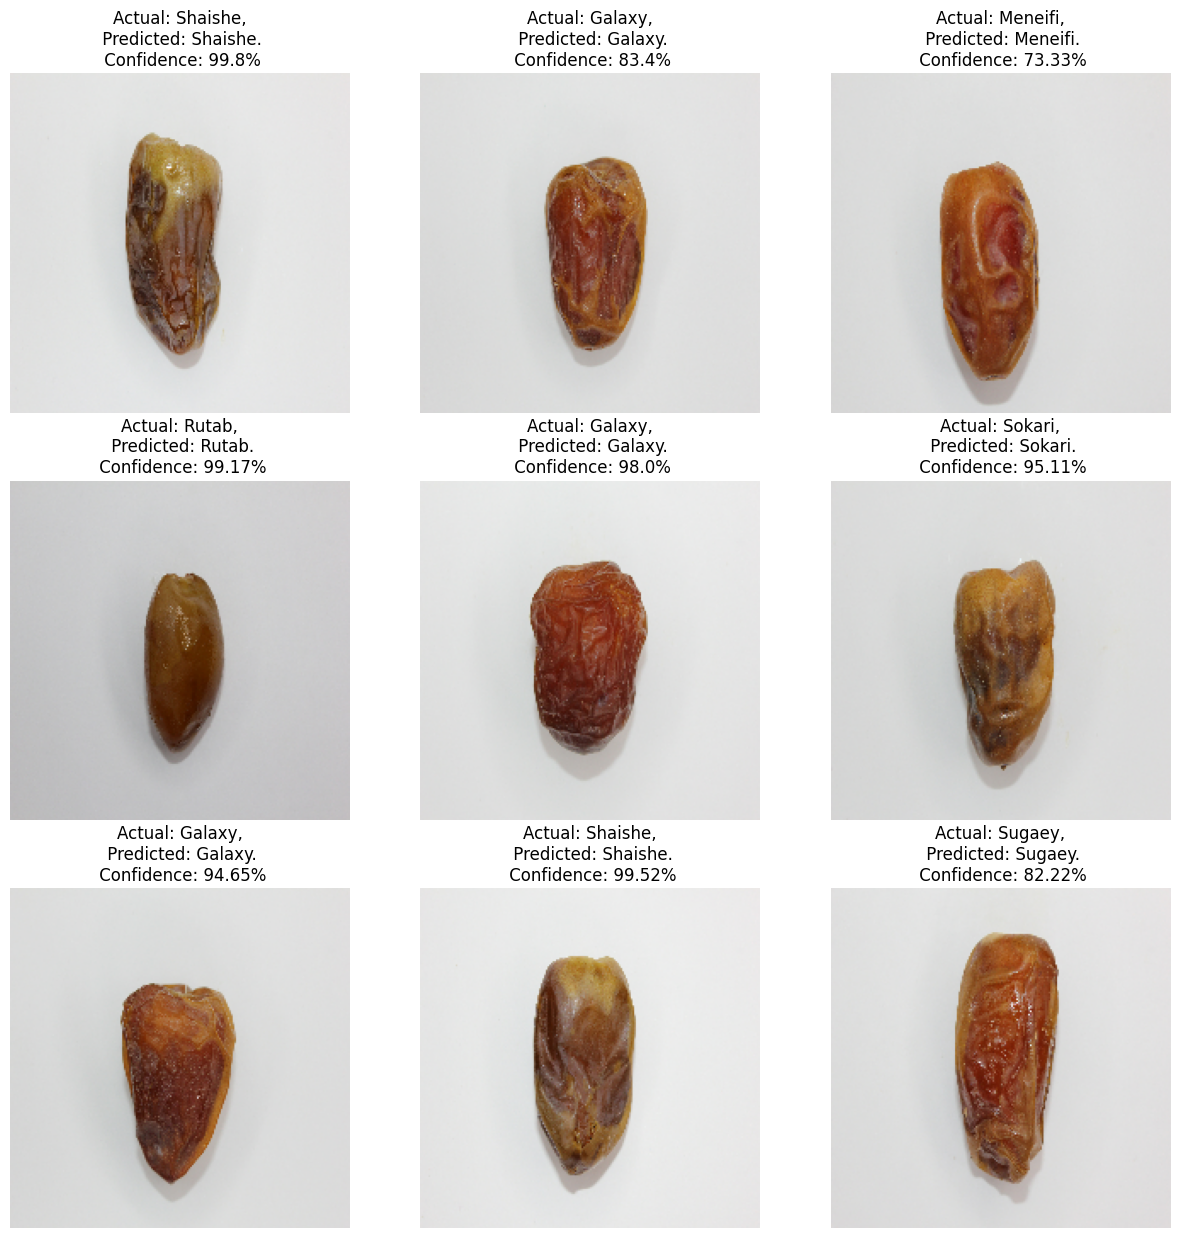

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [25]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/2\assets


INFO:tensorflow:Assets written to: ../saved_models/2\assets


In [26]:
model.save("../dateClassfication.h5")

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
